In [1]:
import pandas as pd
df = pd.read_csv("daycases.csv")

In [2]:
df.head()

,Date,Totalcases,Newcases,Active,Recovered,Deaths
0,1/30/2020,1,1,1,0,0
1,1/31/2020,1,0,1,0,0
2,2/1/2020,1,0,1,0,0
3,2/2/2020,2,1,2,0,0
4,2/3/2020,3,1,3,0,0


In [3]:
# Predicting New Cases of the future:

In [4]:
df.shape

(51, 6)

In [5]:
df.dtypes

Date          object
Totalcases     int64
Newcases       int64
Active         int64
Recovered      int64
Deaths         int64
dtype: object

In [6]:
df.tail()

,Date,Totalcases,Newcases,Active,Recovered,Deaths
46,3/16/2020,114,4,99,13,2
47,3/17/2020,140,26,123,14,2
48,3/18/2020,170,30,153,14,3
49,3/19/2020,198,28,181,14,3
50,3/20/2020,249,51,223,22,4


In [7]:
df.describe()

,Totalcases,Newcases,Active,Recovered,Deaths
count,51.000000,51.000000,51.000000,51.000000,51.000000
mean,33.450980,4.882353,30.156863,2.862745,0.411765
std,56.338375,10.163950,50.426728,5.122576,0.962839
min,1.000000,0.000000,1.000000,0.000000,0.000000
25%,3.000000,0.000000,3.000000,0.000000,0.000000
50%,3.000000,0.000000,3.000000,0.000000,0.000000
75%,40.000000,3.500000,37.000000,3.000000,0.000000
max,249.000000,51.000000,223.000000,22.000000,4.000000


In [8]:
df.plot(kind='line',figsize=(10,5))

In [9]:
# Using Facebook prophet for TS Forecasting

In [10]:
import fbprophet

Importing plotly failed. Interactive plots will not work.


In [11]:
from fbprophet import Prophet 
p=Prophet()

In [12]:
p.add_seasonality(name="daily",period = 1, fourier_order=5)

In [13]:
#Split the dataset
X = df.reset_index()

In [14]:
X

,index,Date,Totalcases,Newcases,Active,Recovered,Deaths
0,0,1/30/2020,1,1,1,0,0
1,1,1/31/2020,1,0,1,0,0
2,2,2/1/2020,1,0,1,0,0
3,3,2/2/2020,2,1,2,0,0
4,4,2/3/2020,3,1,3,0,0
5,5,2/4/2020,3,0,3,0,0
6,6,2/5/2020,3,0,3,0,0
7,7,2/6/2020,3,0,3,0,0
8,8,2/7/2020,3,0,3,0,0
9,9,2/8/2020,3,0,3,0,0


In [15]:
Totalcases = X[['Date','Totalcases']]

In [16]:
Totalcases.head()

,Date,Totalcases
0,1/30/2020,1
1,1/31/2020,1
2,2/1/2020,1
3,2/2/2020,2
4,2/3/2020,3


In [17]:
Recoveredcases = X[['Date','Recovered']]

In [18]:
Totalcases.shape

(51, 2)

In [19]:
Totalcases.rename(columns={"Date":"ds","Totalcases":"y"},inplace=True)

C:\Users\Siddhartha\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [20]:
train = Totalcases[:45]
test = Totalcases[45:]

In [21]:
train

,ds,y
0,1/30/2020,1
1,1/31/2020,1
2,2/1/2020,1
3,2/2/2020,2
4,2/3/2020,3
5,2/4/2020,3
6,2/5/2020,3
7,2/6/2020,3
8,2/7/2020,3
9,2/8/2020,3


In [22]:
test

,ds,y
45,3/15/2020,110
46,3/16/2020,114
47,3/17/2020,140
48,3/18/2020,170
49,3/19/2020,198
50,3/20/2020,249


In [23]:
# Now we can use the model

In [24]:
p.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.


In [25]:
#Future dates:
future = p.make_future_dataframe(periods=6)

In [26]:
future

,ds
0,2020-01-30
1,2020-01-31
2,2020-02-01
3,2020-02-02
4,2020-02-03
5,2020-02-04
6,2020-02-05
7,2020-02-06
8,2020-02-07
9,2020-02-08


In [27]:
#Prediction:

In [28]:
pred = p.predict(future)

In [29]:
pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-30,-0.754198,-36.039742,9.291779,-0.754198,-0.754198,-11.958366,-11.958366,-11.958366,-15.088336,-15.088336,-15.088336,3.129970,3.129970,3.129970,0.0,0.0,0.0,-12.712564
1,2020-01-31,0.686348,-34.542341,11.455129,0.686348,0.686348,-12.114523,-12.114523,-12.114523,-15.088336,-15.088336,-15.088336,2.973813,2.973813,2.973813,0.0,0.0,0.0,-11.428175
2,2020-02-01,2.126894,-30.454566,11.469176,2.126894,2.126894,-10.984181,-10.984181,-10.984181,-15.088336,-15.088336,-15.088336,4.104155,4.104155,4.104155,0.0,0.0,0.0,-8.857287
3,2020-02-02,3.567440,-38.542629,5.991807,3.567440,3.567440,-19.312059,-19.312059,-19.312059,-15.088336,-15.088336,-15.088336,-4.223723,-4.223723,-4.223723,0.0,0.0,0.0,-15.744619
4,2020-02-03,5.007986,-36.544359,7.764857,5.007986,5.007986,-18.920173,-18.920173,-18.920173,-15.088336,-15.088336,-15.088336,-3.831837,-3.831837,-3.831837,0.0,0.0,0.0,-13.912187
5,2020-02-04,6.448533,-34.115005,11.153603,6.448533,6.448533,-17.361016,-17.361016,-17.361016,-15.088336,-15.088336,-15.088336,-2.272680,-2.272680,-2.272680,0.0,0.0,0.0,-10.912483
6,2020-02-05,7.889079,-28.409753,12.996965,7.889079,7.889079,-14.968033,-14.968033,-14.968033,-15.088336,-15.088336,-15.088336,0.120303,0.120303,0.120303,0.0,0.0,0.0,-7.078955
7,2020-02-06,9.329625,-24.737250,18.975939,9.329625,9.329625,-11.958366,-11.958366,-11.958366,-15.088336,-15.088336,-15.088336,3.129970,3.129970,3.129970,0.0,0.0,0.0,-2.628741
8,2020-02-07,10.770171,-22.876421,20.478017,10.770171,10.770171,-12.114523,-12.114523,-12.114523,-15.088336,-15.088336,-15.088336,2.973813,2.973813,2.973813,0.0,0.0,0.0,-1.344352
9,2020-02-08,12.210717,-20.052211,22.064600,12.210717,12.210717,-10.984181,-10.984181,-10.984181,-15.088336,-15.088336,-15.088336,4.104155,4.104155,4.104155,0.0,0.0,0.0,1.226535


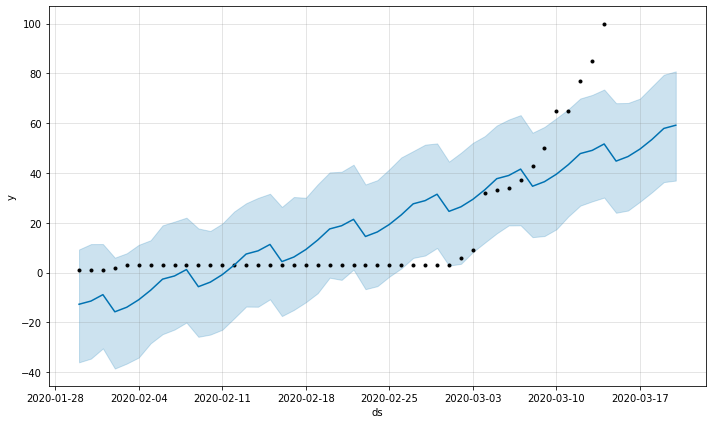

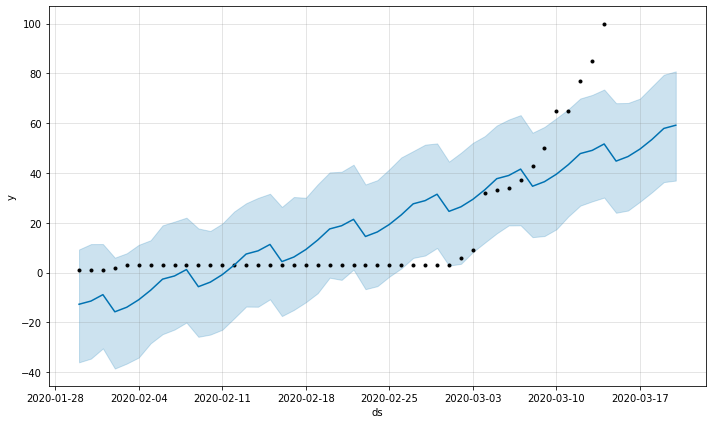

In [30]:
#Potting:
p.plot(pred)

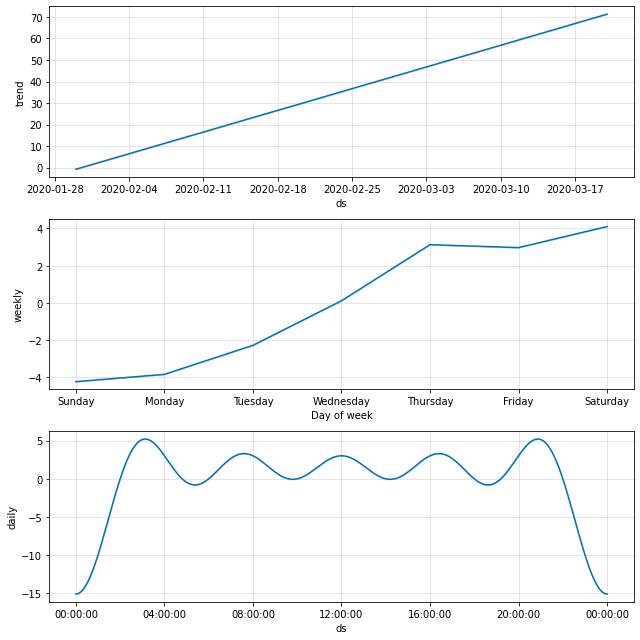

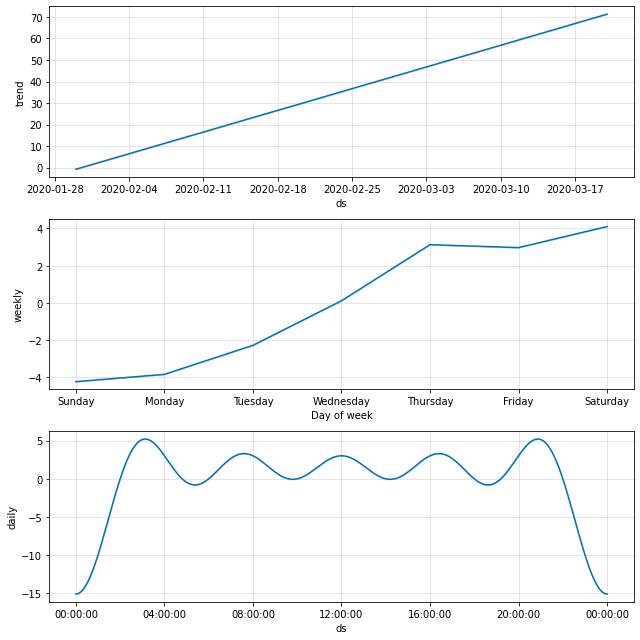

In [31]:
p.plot_components(pred)

In [32]:
test

,ds,y
45,3/15/2020,110
46,3/16/2020,114
47,3/17/2020,140
48,3/18/2020,170
49,3/19/2020,198
50,3/20/2020,249


In [33]:
test['dates'] = pd.to_datetime(test['ds'])

C:\Users\Siddhartha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
test

,ds,y,dates
45,3/15/2020,110,2020-03-15
46,3/16/2020,114,2020-03-16
47,3/17/2020,140,2020-03-17
48,3/18/2020,170,2020-03-18
49,3/19/2020,198,2020-03-19
50,3/20/2020,249,2020-03-20


In [35]:
test = test['y']
test

45    110
46    114
47    140
48    170
49    198
50    249
Name: y, dtype: int64

In [36]:
import matplotlib.pyplot as plt

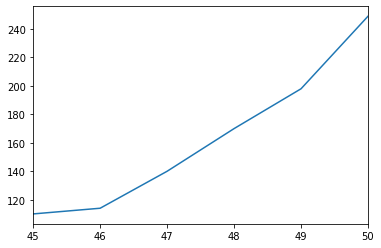

In [37]:
test.plot()

In [38]:
from fbprophet.plot import add_changepoints_to_plot

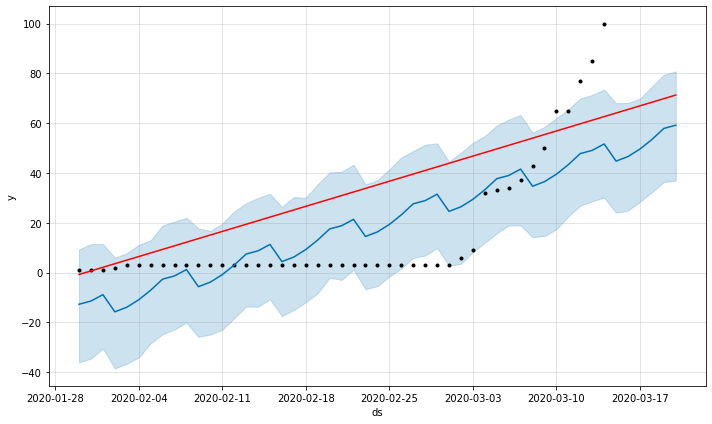

In [39]:
fig = p.plot(pred)
c = add_changepoints_to_plot(fig.gca(),p,pred)